In [11]:
#INF2178 assignment 3 (Winter2024)
#Michelle Lee (student no 1001448169)

#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

#load data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/INF2178_A3_data.csv')

#print first few rows to see content in dataset
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
0             36.58          39.54                     33.822   
1             50.82          44.44                     38.147   
2             40.68          28.57                     28.108   
3             32.57          23.57                     15.404   
4             31.98          19.65                     18.727   

   springreadingscore  springmathscore  springgeneralknowledgescore  \
0               49.37            50.10                       40.533   
1               83.50            58.93                       37.409   
2               40.41            32.81                       29.312   
3               34.14            35.25                       27.382   
4               32.84            23.60                       26.977   

   totalhouseholdincome  incomeinthousands  incomegro

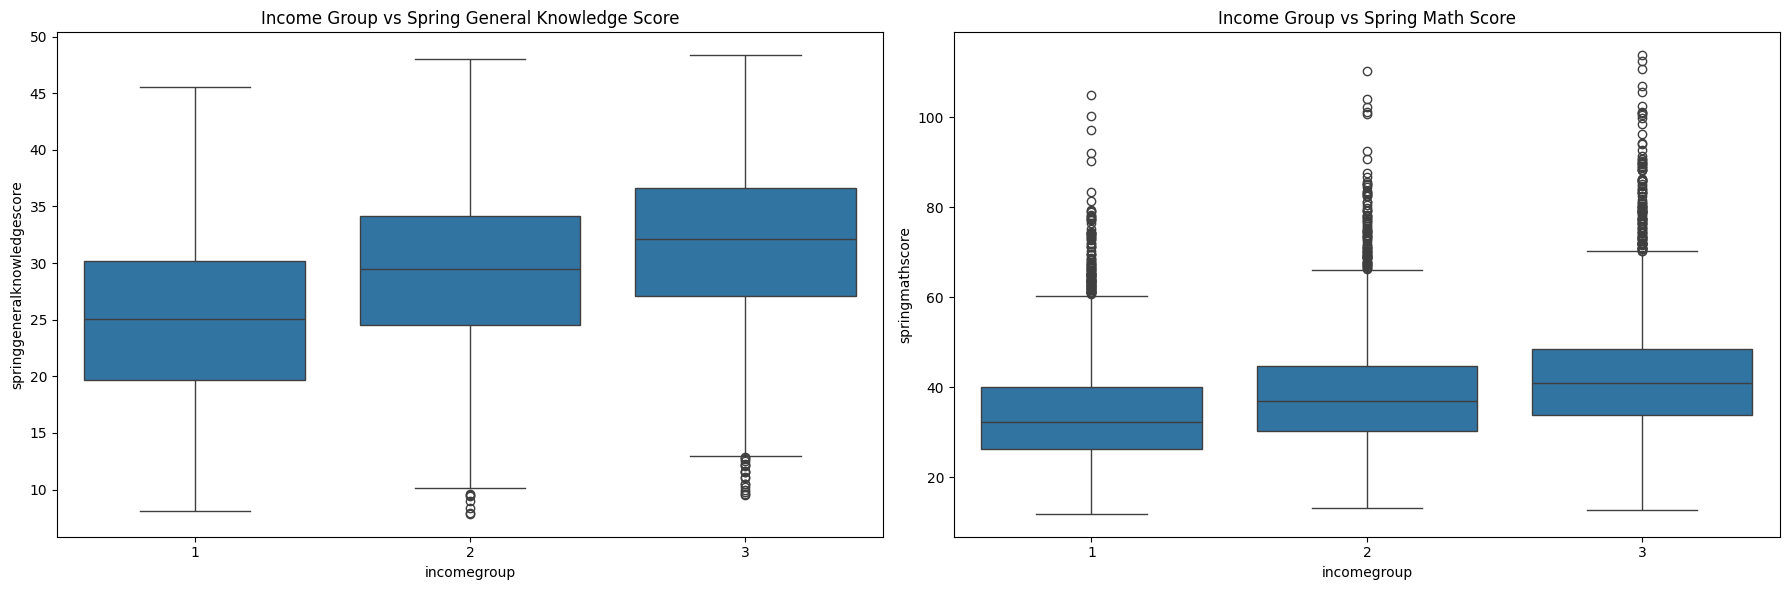

In [12]:
#EDA STUFF

#Boxplots - scores across different income groups
f, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=df, x='incomegroup', y='springgeneralknowledgescore', ax=axes[0])
axes[0].set_title('Income Group vs Spring General Knowledge Score')

sns.boxplot(data=df, x='incomegroup', y='springmathscore', ax=axes[1])
axes[1].set_title('Income Group vs Spring Math Score')

plt.tight_layout()
plt.show()

In [26]:
#perform ANCOVA
%pip install pingouin
from pingouin import ancova
#ANCOVA for Spring General Knowledge Score
ancova_gk = sm.formula.ols('springgeneralknowledgescore ~ C(incomegroup) + totalhouseholdincome', data=df).fit() #OLS model
ancova_gk_results = ancova(data=df, dv='springgeneralknowledgescore', covar='totalhouseholdincome', between='incomegroup')

#ANCOVA for Spring Math Score
ancova_math = sm.formula.ols('springmathscore ~ C(incomegroup) + totalhouseholdincome', data=df).fit() #OLS model
ancova_math_results = ancova(data=df, dv='springmathscore', covar='totalhouseholdincome', between='incomegroup')

print("ANCOVA Results for Spring General Knowledge Score:")
print(ancova_gk_results)
print("\nANCOVA Results for Spring Math Score:")
print(ancova_math_results)

ANCOVA Results for Spring General Knowledge Score:
                 Source             SS     DF           F         p-unc  \
0           incomegroup    8159.506549      2   83.321298  1.159955e-36   
1  totalhouseholdincome   11924.070784      1  243.526750  2.304939e-54   
2              Residual  584092.877452  11929         NaN           NaN   

        np2  
0  0.013777  
1  0.020006  
2       NaN  

ANCOVA Results for Spring Math Score:
                 Source            SS     DF           F         p-unc  \
0           incomegroup  5.430347e+03      2   20.915044  8.562496e-10   
1  totalhouseholdincome  2.937562e+04      1  226.281078  1.123827e-50   
2              Residual  1.548613e+06  11929         NaN           NaN   

        np2  
0  0.003494  
1  0.018616  
2       NaN  


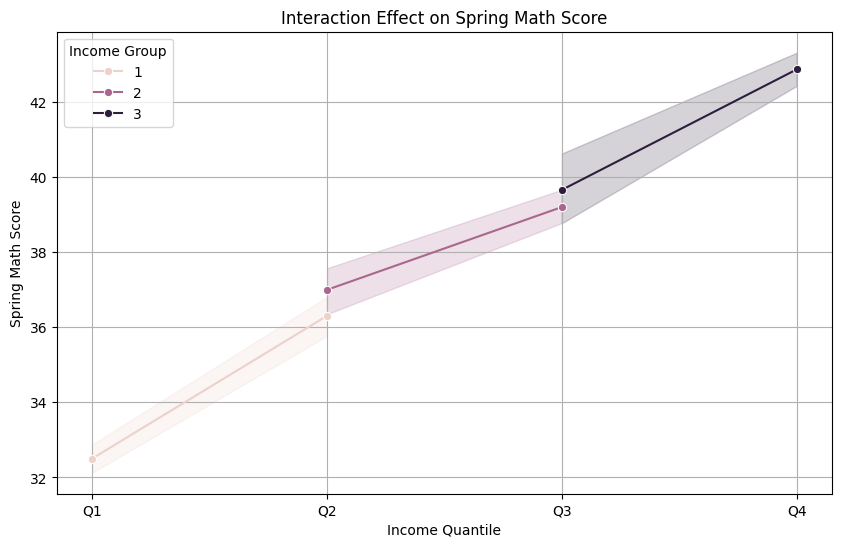

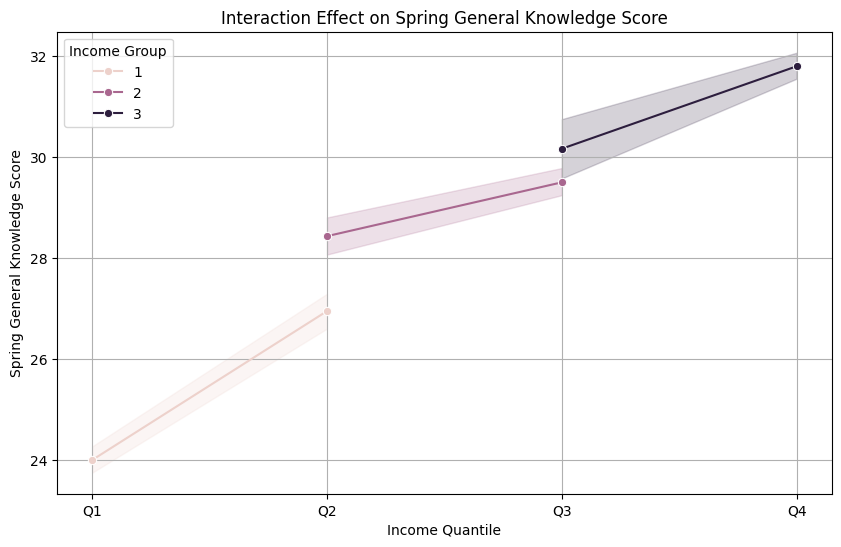

In [14]:
#interaction plot
#put new column for income quantiles to mamke it clearer
df['income_quantile'] = pd.qcut(df['incomeinthousands'], 4, labels=["Q1", "Q2", "Q3", "Q4"])

#interaction plot - springmathscore
plt.figure(figsize=(10, 6))
sns.lineplot(x='income_quantile', y='springmathscore', hue='incomegroup', data=df, marker='o')
plt.title('Interaction Effect on Spring Math Score')
plt.xlabel('Income Quantile')
plt.ylabel('Spring Math Score')
plt.legend(title='Income Group')
plt.grid(True)
plt.show()

#interaction plot - springgeneralknowledgescore
plt.figure(figsize=(10, 6))
sns.lineplot(x='income_quantile', y='springgeneralknowledgescore', hue='incomegroup', data=df, marker='o')
plt.title('Interaction Effect on Spring General Knowledge Score')
plt.xlabel('Income Quantile')
plt.ylabel('Spring General Knowledge Score')
plt.legend(title='Income Group')
plt.grid(True)
plt.show()

In [15]:
#assumption: homogenity of variances
#import librarires
from scipy.stats import levene, shapiro
import matplotlib.pyplot as plt

#Levene's test for homogeneity of variances
levene_general_knowledge = levene(df['springgeneralknowledgescore'], df['incomegroup'], center='mean')
levene_math_score = levene(df['springmathscore'], df['incomegroup'], center='mean')

levene_general_knowledge, levene_math_score

(LeveneResult(statistic=18852.82393452868, pvalue=0.0),
 LeveneResult(statistic=14396.882936456146, pvalue=0.0))

In [28]:
#assumption: normality of residuals
from scipy.stats import shapiro

# Extract residuals from the OLS model fits
residuals_gk = ancova_gk.resid
residuals_math = ancova_math.resid

# Perform Shapiro-Wilk test for normality on the residuals
shapiro_test_gk = shapiro(residuals_gk)
shapiro_test_math = shapiro(residuals_math)

print("Shapiro-Wilk Test for Normality of Residuals - General Knowledge Score:")
print(f"Statistic: {shapiro_test_gk[0]}, p-value: {shapiro_test_gk[1]}")

print("\nShapiro-Wilk Test for Normality of Residuals - Math Score:")
print(f"Statistic: {shapiro_test_math[0]}, p-value: {shapiro_test_math[1]}")


Shapiro-Wilk Test for Normality of Residuals - General Knowledge Score:
Statistic: 0.996954619884491, p-value: 5.782170888060179e-15

Shapiro-Wilk Test for Normality of Residuals - Math Score:
Statistic: 0.9464775919914246, p-value: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
